In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [9]:
# Load the dataset
df = pd.read_csv("gender_submission.csv")

In [11]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [13]:
# Display dataset info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None


In [15]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
PassengerId    0
Survived       0
dtype: int64


In [17]:
# Check survival rates
print("\nSurvival Rate:")
survival_rate = df["Survived"].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")


Survival Rate:
Overall Survival Rate: 36.36%


In [19]:
# Add a hypothetical feature: Even/Odd Passenger ID survival
df["Passenger_Group"] = df["PassengerId"] % 2  # 0 for even, 1 for odd

/var/folders/r3/trn6xwcx7js3_2j79fkcxz880000gn/T/ipykernel_21042/2445076293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Passenger_Group", y="Survived", data=df, palette="coolwarm")


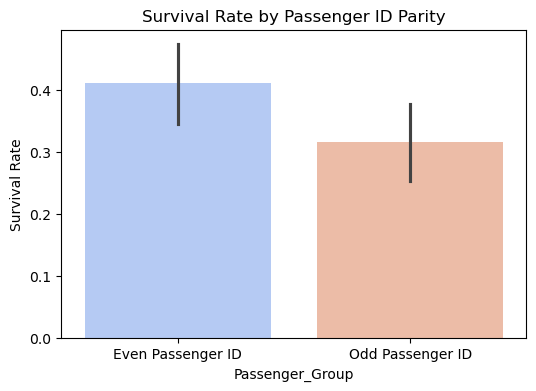

In [21]:
# Visualize survival by Passenger ID group
plt.figure(figsize=(6, 4))
sns.barplot(x="Passenger_Group", y="Survived", data=df, palette="coolwarm")
plt.xticks([0, 1], ["Even Passenger ID", "Odd Passenger ID"])
plt.title("Survival Rate by Passenger ID Parity")
plt.ylabel("Survival Rate")
plt.show()

In [23]:
# Random sampling for inspection
sample_df = df.sample(10, random_state=42)
print("\nRandom Sample of the Dataset:")
print(sample_df)


Random Sample of the Dataset:
     PassengerId  Survived  Passenger_Group
321         1213         0                1
324         1216         1                0
388         1280         0                0
56           948         0                0
153         1045         1                1
30           922         0                0
72           964         1                0
82           974         0                0
258         1150         1                0
416         1308         0                0


In [25]:
# Creating synthetic Fare and Age data for visualization
np.random.seed(42)
df["Fare"] = np.random.randint(5, 100, size=len(df))
df["Age"] = np.random.randint(10, 70, size=len(df))

/var/folders/r3/trn6xwcx7js3_2j79fkcxz880000gn/T/ipykernel_21042/3298729266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="viridis")


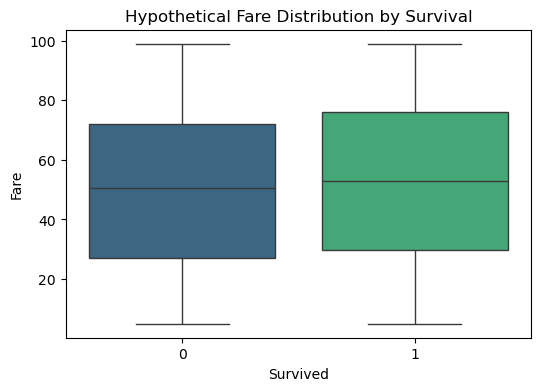

In [27]:
# Visualizing survival vs synthetic Fare
plt.figure(figsize=(6, 4))
sns.boxplot(x="Survived", y="Fare", data=df, palette="viridis")
plt.title("Hypothetical Fare Distribution by Survival")
plt.show()

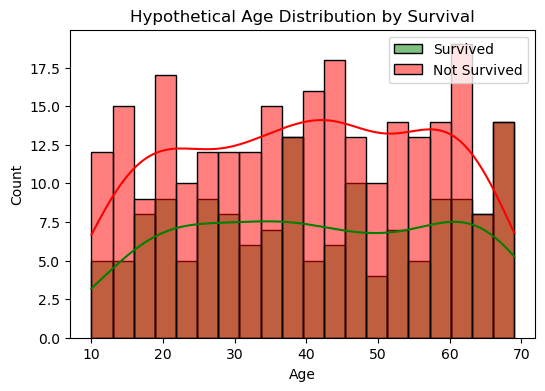

In [29]:
# Visualizing survival vs synthetic Age
plt.figure(figsize=(6, 4))
sns.histplot(df[df["Survived"] == 1]["Age"], bins=20, kde=True, color="green", label="Survived")
sns.histplot(df[df["Survived"] == 0]["Age"], bins=20, kde=True, color="red", label="Not Survived")
plt.title("Hypothetical Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()
